In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt  
import seaborn as sns             
from sklearn.decomposition import PCA
# Model Selection / Preprocessing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.preprocessing import LabelEncoder
from itertools import combinations
from sklearn.neighbors import KNeighborsClassifier

# Linear Models
from sklearn.linear_model import  LogisticRegression

# Support Vector Machines
from sklearn.svm import SVC

# Metrics
from sklearn.metrics import confusion_matrix, classification_report,roc_auc_score,accuracy_score


# Heart Failure Dataset

In [5]:
df = pd.read_csv('/home/haider/Desktop/Office/Python/Projects/heart-failure-prediction/data/heart.csv')

In [6]:
df.head(10)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0
5,39,M,NAP,120,339,0,Normal,170,N,0.0,Up,0
6,45,F,ATA,130,237,0,Normal,170,N,0.0,Up,0
7,54,M,ATA,110,208,0,Normal,142,N,0.0,Up,0
8,37,M,ASY,140,207,0,Normal,130,Y,1.5,Flat,1
9,48,F,ATA,120,284,0,Normal,120,N,0.0,Up,0


In [7]:
df.shape

(918, 12)

In [8]:
df.dtypes

Age                 int64
Sex                object
ChestPainType      object
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG         object
MaxHR               int64
ExerciseAngina     object
Oldpeak           float64
ST_Slope           object
HeartDisease        int64
dtype: object

In [9]:
df.isna().sum()

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

In [10]:
df.describe()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
count,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000,918.000000
mean,53.510893,132.396514,198.799564,0.233115,136.809368,0.887364,0.553377
std,9.432617,18.514154,109.384145,0.423046,25.460334,1.066570,0.497414
min,28.000000,0.000000,0.000000,0.000000,60.000000,-2.600000,0.000000
25%,47.000000,120.000000,173.250000,0.000000,120.000000,0.000000,0.000000
50%,54.000000,130.000000,223.000000,0.000000,138.000000,0.600000,1.000000
75%,60.000000,140.000000,267.000000,0.000000,156.000000,1.500000,1.000000
max,77.000000,200.000000,603.000000,1.000000,202.000000,6.200000,1.000000


In [74]:
le = LabelEncoder()
df['Sex'] = le.fit_transform(df['Sex'])
df['ExerciseAngina'] = le.fit_transform(df['ExerciseAngina'])




df.head(10)



,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,1,1,140,289,0,1,172,0,0.0,2,0
1,49,0,2,160,180,0,1,156,0,1.0,1,1
2,37,1,1,130,283,0,2,98,0,0.0,2,0
3,48,0,0,138,214,0,1,108,1,1.5,1,1
4,54,1,2,150,195,0,1,122,0,0.0,2,0
5,39,1,2,120,339,0,1,170,0,0.0,2,0
6,45,0,1,130,237,0,1,170,0,0.0,2,0
7,54,1,1,110,208,0,1,142,0,0.0,2,0
8,37,1,0,140,207,0,1,130,1,1.5,1,1
9,48,0,1,120,284,0,1,120,0,0.0,2,0


In [75]:
df.dtypes

Age                 int64
Sex                 int64
ChestPainType       int64
RestingBP           int64
Cholesterol         int64
FastingBS           int64
RestingECG          int64
MaxHR               int64
ExerciseAngina      int64
Oldpeak           float64
ST_Slope            int64
HeartDisease        int64
dtype: object

In [76]:
df_linear = pd.get_dummies(df, columns=['ChestPainType', 'RestingECG', 'ST_Slope'], drop_first=True)


In [77]:
df_non_linear =  pd.get_dummies(df, columns=['ChestPainType', 'RestingECG', 'ST_Slope'], drop_first=False)


In [78]:
df_linear.head(10)

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ChestPainType_1,ChestPainType_2,ChestPainType_3,RestingECG_1,RestingECG_2,ST_Slope_1,ST_Slope_2
0,40,1,140,289,0,172,0,0.0,0,True,False,False,True,False,False,True
1,49,0,160,180,0,156,0,1.0,1,False,True,False,True,False,True,False
2,37,1,130,283,0,98,0,0.0,0,True,False,False,False,True,False,True
3,48,0,138,214,0,108,1,1.5,1,False,False,False,True,False,True,False
4,54,1,150,195,0,122,0,0.0,0,False,True,False,True,False,False,True
5,39,1,120,339,0,170,0,0.0,0,False,True,False,True,False,False,True
6,45,0,130,237,0,170,0,0.0,0,True,False,False,True,False,False,True
7,54,1,110,208,0,142,0,0.0,0,True,False,False,True,False,False,True
8,37,1,140,207,0,130,1,1.5,1,False,False,False,True,False,True,False
9,48,0,120,284,0,120,0,0.0,0,True,False,False,True,False,False,True


In [79]:
df_non_linear.head(10)

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,HeartDisease,ChestPainType_0,ChestPainType_1,ChestPainType_2,ChestPainType_3,RestingECG_0,RestingECG_1,RestingECG_2,ST_Slope_0,ST_Slope_1,ST_Slope_2
0,40,1,140,289,0,172,0,0.0,0,False,True,False,False,False,True,False,False,False,True
1,49,0,160,180,0,156,0,1.0,1,False,False,True,False,False,True,False,False,True,False
2,37,1,130,283,0,98,0,0.0,0,False,True,False,False,False,False,True,False,False,True
3,48,0,138,214,0,108,1,1.5,1,True,False,False,False,False,True,False,False,True,False
4,54,1,150,195,0,122,0,0.0,0,False,False,True,False,False,True,False,False,False,True
5,39,1,120,339,0,170,0,0.0,0,False,False,True,False,False,True,False,False,False,True
6,45,0,130,237,0,170,0,0.0,0,False,True,False,False,False,True,False,False,False,True
7,54,1,110,208,0,142,0,0.0,0,False,True,False,False,False,True,False,False,False,True
8,37,1,140,207,0,130,1,1.5,1,True,False,False,False,False,True,False,False,True,False
9,48,0,120,284,0,120,0,0.0,0,False,True,False,False,False,True,False,False,False,True


In [80]:
df_linear = df_linear.astype({col: int for col in df_linear.select_dtypes('bool').columns})


In [81]:
df_non_linear = df_non_linear.astype({col: int for col in df_non_linear.select_dtypes('bool').columns})


## Linear Models and their visualisation

#### Class Separation

In [82]:
# # Select only numerical columns (excluding target)
# numerical_cols = df_linear.select_dtypes(include=['int64', 'float64']).drop(columns=['HeartDisease']).columns

# # Loop over all 2-feature combinations
# feature_pairs = list(combinations(numerical_cols, 2))

# # Plot
# plt.figure(figsize=(15, len(feature_pairs) * 3))

# for i, (x_feat, y_feat) in enumerate(feature_pairs, 1):
#     plt.subplot(len(feature_pairs), 2, i)
#     sns.scatterplot(data=df_linear, x=x_feat, y=y_feat, hue='HeartDisease', palette='coolwarm', alpha=0.7)
#     plt.title(f"{x_feat} vs {y_feat}")
#     plt.tight_layout()

# plt.show()

### SVM
In the scatter plots observed, there is a complex relationship among data points so we will choose rbf kernel for our SVM 

In [83]:
x = df_linear.drop(columns=['HeartDisease'])
y = df_linear['HeartDisease']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)


In [84]:
scaler = StandardScaler()
x_train_svm_scaled = scaler.fit_transform(x_train)
x_test_svm_scaled = scaler.transform(x_test)

In [85]:
model = SVC(kernel='rbf', C=1, gamma='scale')  # You can tune C and gamma later
model.fit(x_train_svm_scaled, y_train)


,C,1
,kernel,'rbf'
,degree,3
,gamma,'scale'
,coef0,0.0
,shrinking,True
,probability,False
,tol,0.001
,cache_size,200
,class_weight,None
,verbose,False


In [86]:
y_pred = model.predict(x_test_svm_scaled)

print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))


Confusion Matrix:
 [[67 10]
 [13 94]]

Classification Report:
               precision    recall  f1-score   support

           0       0.84      0.87      0.85        77
           1       0.90      0.88      0.89       107

    accuracy                           0.88       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.88      0.88      0.88       184



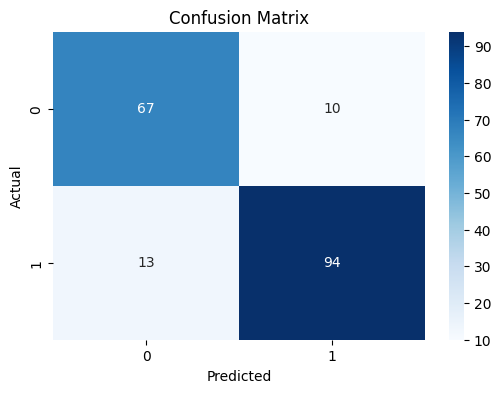

In [87]:


# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1], yticklabels=[0, 1])

plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [88]:
roc_auc = roc_auc_score(y_test, y_pred)
print(f"ROC AUC Score: {roc_auc:.4f}")

ROC AUC Score: 0.8743


### Logistic Regression

In [89]:
logistic_model = LogisticRegression(max_iter=1000)
logistic_model.fit(x_train, y_train)

/home/haider/Desktop/Office/Python/Projects/heart-failure-prediction/venv/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 1000 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=1000).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


,penalty,'l2'
,dual,False
,tol,0.0001
,C,1.0
,fit_intercept,True
,intercept_scaling,1
,class_weight,None
,random_state,None
,solver,'lbfgs'
,max_iter,1000
,multi_class,'deprecated'


In [90]:
y_pred = logistic_model.predict(x_test)
y_pred_proba = logistic_model.predict_proba(x_test)[:, 1]
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Confusion Matrix:
 [[67 10]
 [17 90]]

Classification Report:
               precision    recall  f1-score   support

           0       0.80      0.87      0.83        77
           1       0.90      0.84      0.87       107

    accuracy                           0.85       184
   macro avg       0.85      0.86      0.85       184
weighted avg       0.86      0.85      0.85       184



SVM gives a better score than the logistic regression

### Non linear Model Evaluations

#### K-Nearest Neighbors

In [91]:
df_encoded = df.copy()
categorical_cols = ['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope']

le = LabelEncoder()
for col in categorical_cols:
    df_encoded[col] = le.fit_transform(df_encoded[col])


In [92]:
X = df_encoded.drop('HeartDisease', axis=1)
y = df_encoded['HeartDisease']

In [93]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [96]:
knn = KNeighborsClassifier(n_neighbors=5, metric='manhattan')  
knn.fit(X_train_scaled, y_train)

,n_neighbors,5
,weights,'uniform'
,algorithm,'auto'
,leaf_size,30
,p,2
,metric,'manhattan'
,metric_params,None
,n_jobs,None


In [97]:
y_pred = knn.predict(X_test_scaled)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.8858695652173914
Confusion Matrix:
 [[70  7]
 [14 93]]
Classification Report:
               precision    recall  f1-score   support

           0       0.83      0.91      0.87        77
           1       0.93      0.87      0.90       107

    accuracy                           0.89       184
   macro avg       0.88      0.89      0.88       184
weighted avg       0.89      0.89      0.89       184



KNN gives better results than logistic regression